<img src="./images/DLI_Header.png" width=400/>

# Fundamentals of Accelerated Data Science # 

## 03 - DBSCAN ##

**Table of Contents**
<br>
This notebook uses GPU-accelerated DBSCAN to identify clusters of infected people. This notebook covers the below sections: 
1. [Environment](#Environment)
2. [Load Data](#Load-Data)
3. [DBSCAN Clustering](#DBSCAN-Clustering)
    * [Exercise #1 - Make Another DBSCAN Instance](#Exercise-#1---Make-Another-DBSCAN-Instance)
4. [Visualize the Clusters](#Visualize-the-Clusters)

## Environment ##

In [1]:
import cudf
import cuml

import cuxfilter as cxf

## Load Data ##
For this notebook, we again load a subset of our population data with only the columns we need. An `infected` column has been added to the data to indicate whether or not a person is known to be infected with our simulated virus.

In [2]:
gdf = cudf.read_csv('./data/pop_sample.csv', dtype=['float32', 'float32', 'float32'])
print(gdf.dtypes)
gdf.shape

northing    float32
easting     float32
infected    float32
dtype: object


(1000000, 3)

In [3]:
gdf.head()

,northing,easting,infected
0,178547.296875,368012.1250,0.0
1,174068.281250,543802.1250,0.0
2,358293.687500,435639.8750,0.0
3,87240.304688,389607.3750,0.0
4,158261.015625,340764.9375,0.0


In [4]:
gdf['infected'].value_counts()

infected
0.0    984331
1.0     15669
Name: count, dtype: int64

## DBSCAN Clustering ##
DBSCAN is another unsupervised clustering algorithm that is particularly effective when the number of clusters is not known up front and the clusters may have concave or other unusual shapes--a situation that often applies in geospatial analytics.

In this series of exercises you will use DBSCAN to identify clusters of infected people by location, which may help us identify groups becoming infected from common patient zeroes and assist in response planning.

Create a DBSCAN instance by using `cuml.DBSCAN`. Pass in the named argument `eps` (the maximum distance a point can be from the nearest point in a cluster to be considered possibly in that cluster) to be `5000`. Since the `northing` and `easting` values we created are measured in meters, this will allow us to identify clusters of infected people where individuals may be separated from the rest of the cluster by up to 5 kilometers.

Below we train a DBSCAN algorithm. We start by creating a new dataframe from rows of the original dataframe where `infected` is `1` (true), and call it `infected_df`--be sure to reset the dataframe's index afterward. Use `dbscan.fit_predict` to perform clustering on the `northing` and `easting` columns of `infected_df`, and turn the resulting series into a new column in `infected_gdf` called "cluster". Finally, compute the number of clusters identified by DBSCAN.

In [5]:
dbscan = cuml.DBSCAN(eps=5000)
# dbscan = cuml.DBSCAN(eps=10000)

infected_df = gdf[gdf['infected'] == 1].reset_index()
infected_df['cluster'] = dbscan.fit_predict(infected_df[['northing', 'easting']])
infected_df['cluster'].nunique()

96

### Exercise #1 - Make Another DBSCAN Instance ###

**Instructions**: <br>
* Modify the `<FIXME>` only and execute the below cell to instantiate a DBSCAN instance with `10000` for `eps`.
* Modify the `<FIXME>` only and execute the cell below to fit the data and identify infected clusters. 

In [6]:
dbscan = cuml.DBSCAN(eps=10000)

In [7]:
infected_df = gdf[gdf['infected'] == 1].reset_index()
infected_df['cluster'] = dbscan.fit_predict(infected_df[['northing', 'easting']])
infected_df['cluster'].nunique()

10

In [10]:
infected_df.head()

,index,northing,easting,infected,cluster
0,41,595509.250000,426545.59375,1.0,4
1,182,185086.609375,547718.00000,1.0,0
2,190,183406.546875,528708.06250,1.0,0
3,216,373846.562500,485603.84375,1.0,0
4,266,194947.406250,535378.37500,1.0,0


## Visualize the Clusters

Because we have the same column names as in the K-means example--`easting`, `northing`, and `cluster`--we can use the same code to visualize the clusters.

<Axes: xlabel='easting', ylabel='northing'>

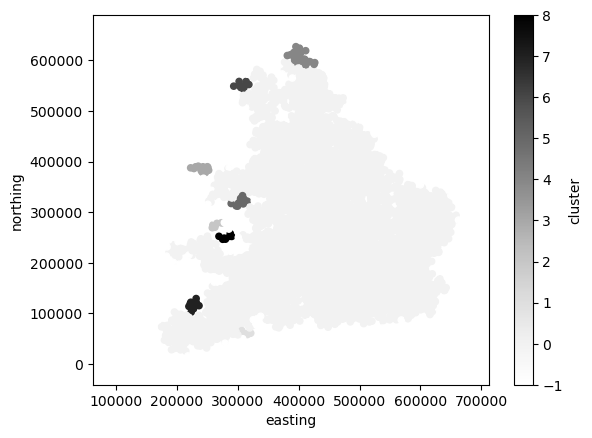

In [11]:
infected_df.to_pandas().plot(kind='scatter', x='easting', y='northing', c='cluster')

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

**Well Done!** Let's move to the [next notebook](2-04_logistic_regression.ipynb). 

<img src="./images/DLI_Header.png" width=400/>